In [540]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import networkx as nx

from cellmating.utils import file_traverse, load_from_pkl
from cellmating.io import imread

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

from cellmating.plotlib._gray2color import multigray2rgb

from cellmating.cells import Cell, Cells
from cellmating.mating import Mating
from cellmating.cells import create_cells_from_image, Cells, create_cells_from_tracker

In [585]:
from script_wlli.for_check_result_utils import draw_subgraph
from script_wlli.for_check_result_utils import show_quantification
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [586]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  195


In [587]:
file_name = file_list[1]

In [588]:
key = int(file_name.split("_")[-1][:-4])
image = imread(file_name)
g = load_from_pkl(file_name[:-4]+".network")
cells = create_cells_from_image(image[:,-1], g)
key = int(file_name.split("_")[-1][:-4])
key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000

In [589]:
c_mating = Mating(image=image, cells=cells, center=key, g=g)

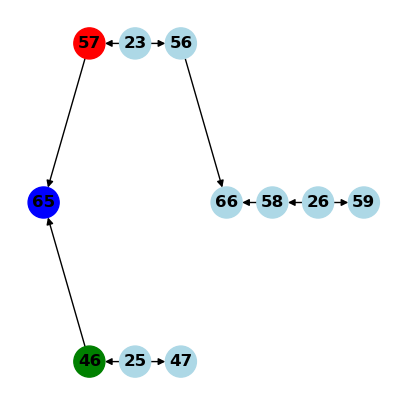

In [590]:
draw_subgraph(g, key, c_mating.p, c_mating.m)

In [591]:
time = 97
id = 3

In [592]:
data[["p_id", "m_id"]]

,p_id,m_id
0,46,14
1,46,22
2,46,29
3,46,58
4,19,58
5,24,58
6,46,58


In [593]:
data = c_mating.center_cells_potential_pairs(time)
p, m ,f = data[["p_id", "m_id", "flag"]].astype(np.int_).loc[id]
show_image = multigray2rgb(image[time, 0:3], axis=0,  colors_channel={"r": 2, "g": 1, "a":0})

pairs: 6
angle p:  84.7654647362752 14 
angle m:  25.351896762525584 25


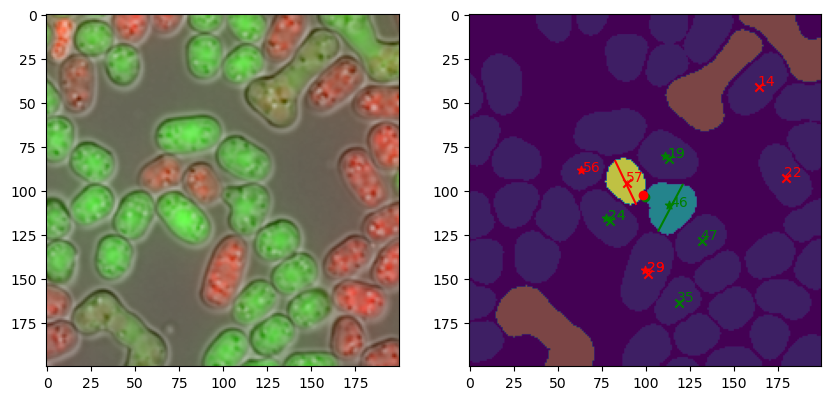

In [594]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
axs[0].imshow(show_image)
axs[1].imshow((image[time, -1]%1000==p)*1 + (image[time, -1]%1000==m)*2)
axs[1].imshow(image[time, -1], alpha=0.3)
show_quantification(c_mating, data, id=id, time=time, ax=axs[1])
